This file is where we cleaned our data set by dropping colunms that were not usefull, dropping null values, converting the LOS colunm to numeric, and renaming colunms. We then saved our changes in a new data set. This is a critcal step in the project as before this the data is very messy and hard to work with.

## Install neccesary resources

In [ ]:
%pip install seaborn
%pip install missingno
%pip install plotly
%pip install numpy
%pip install pandas
%pip install nltk
%pip install nbformat
%pip install scikit-learn
%pip install jupyter tensorflow


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Complete imports and read in only the most useful colunms

In [2]:
# Data Processing
import os
import numpy as np
import pandas as pd
# Basic Visualization tools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
df = pd.read_csv('./hospital.csv', usecols=[ 'Age Group', 'Gender', 'Length of Stay', 'Type of Admission', 'CCSR Diagnosis Description', 'CCSR Procedure Description', 'APR DRG Description', 'APR MDC Description', 
                                              'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Emergency Department Indicator'])

In [3]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<Axes: >

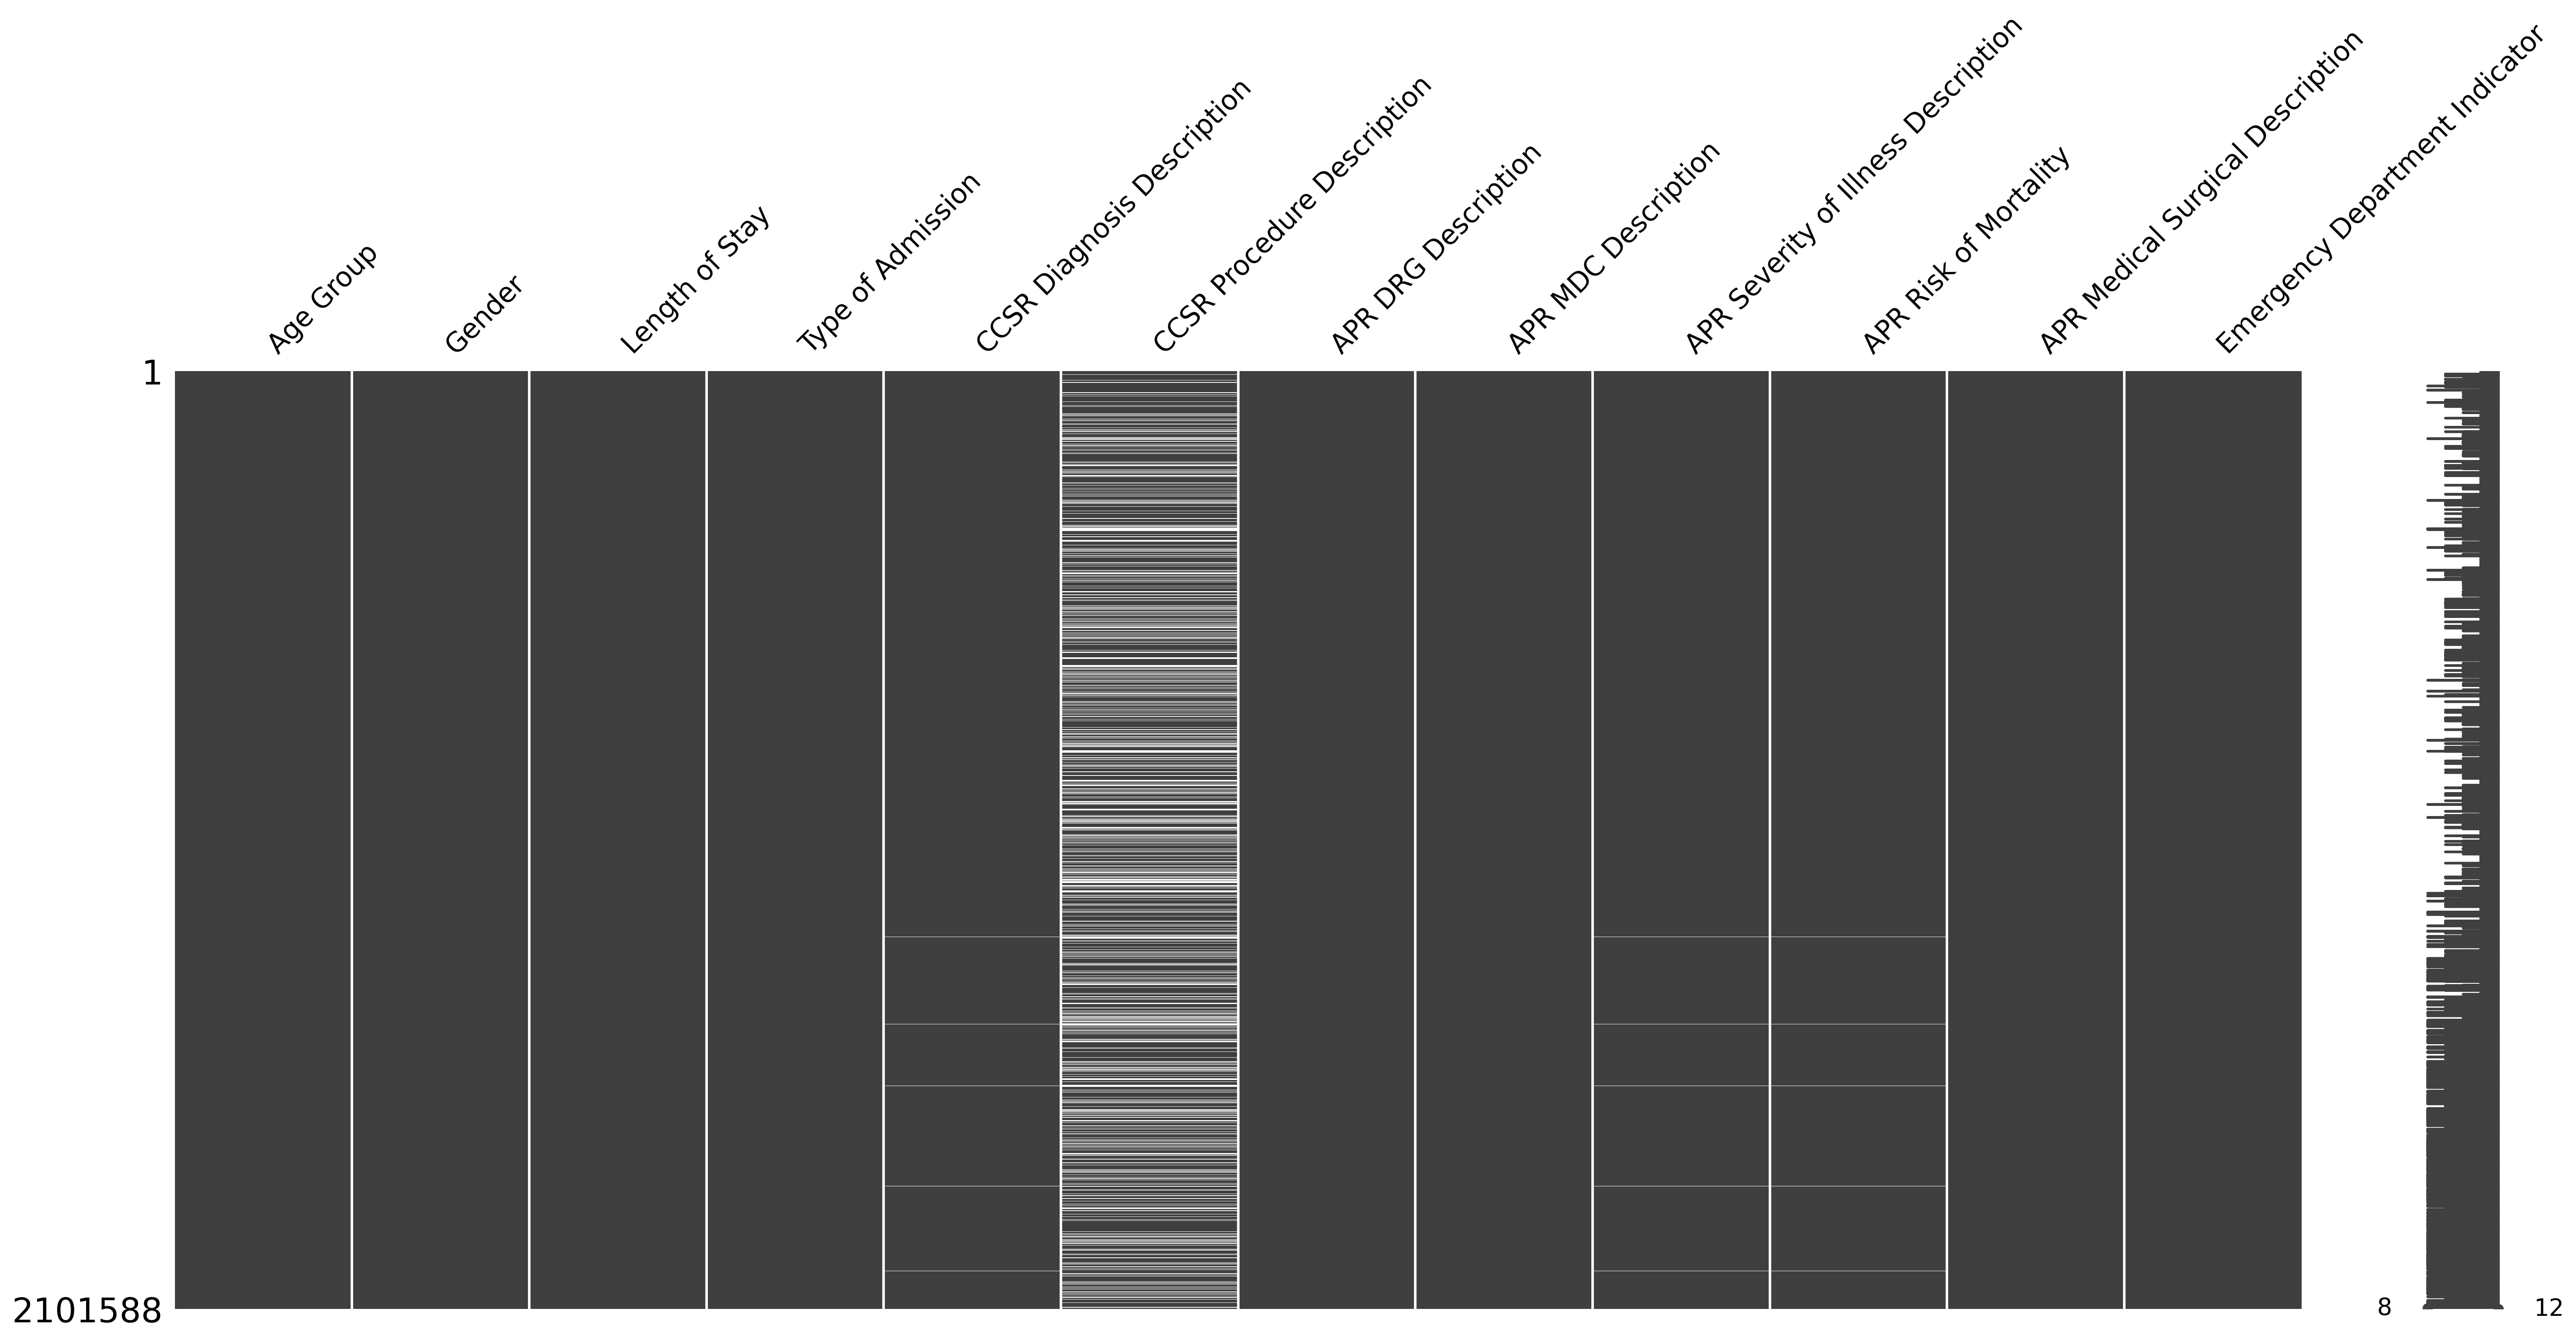

In [4]:
import missingno as msno
msno.matrix(df)

## Rename Colunms

In [5]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace(r'[^0-9a-z_]', '', regex=True)
)


## Drop null values in length of stay


In [6]:
initial_rows = len(df)
df = df.dropna(subset=['length_of_stay'])
dropped_nulls = initial_rows - len(df)
print(f"Dropped {dropped_nulls} rows with null length_of_stay")

initial_rows = len(df)
df['length_of_stay'] = pd.to_numeric(df['length_of_stay'], errors='coerce')
df = df.dropna(subset=['length_of_stay'])
dropped_non_numeric = initial_rows - len(df)
print(f"Dropped {dropped_non_numeric} rows during conversion to numeric")

Dropped 0 rows with null length_of_stay
Dropped 1561 rows during conversion to numeric


## Printing the head of the data to ensure evrything is ok

In [7]:
fig = go.Figure()
fig.add_trace(
    go.Table(header=dict(values=df.columns, fill_color='paleturquoise'),
            cells=dict(values=df.head(100).T, fill_color='lavender'))
)
fig.show()

## Get Unique Counts

In [8]:

unique_counts = df.nunique()
print("Unique value counts per column:")
print(unique_counts)

Unique value counts per column:
age_group                                5
gender                                   3
length_of_stay                         119
type_of_admission                        6
ccsr_diagnosis_description             477
ccsr_procedure_description             320
apr_drg_description                    334
apr_mdc_description                     26
apr_severity_of_illness_description      4
apr_risk_of_mortality                    4
apr_medical_surgical_description         3
emergency_department_indicator           2
dtype: int64


In [9]:
# Compute how many rows remain if we drop any entry with a null in any column
rows_before = len(df)
rows_after = df.dropna().shape[0]
print(f"\nRows before dropping nulls: {rows_before}")
print(f"Rows after dropping any nulls: {rows_after}")


Rows before dropping nulls: 2100027
Rows after dropping any nulls: 1522692


## Drop all remaining Null values

In [10]:
df = df.dropna()

## Save the new data

In [11]:
df.to_csv('hospital_cleaned.csv', index=False)